In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import re

In [4]:
import seaborn as sns
# 지도 시각화를 위해
import folium

# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 

In [5]:
shop_2018 = pd.read_csv('01.csv', encoding='cp949')
shop_2018.head(2)

상가업소번호          상호명      지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0  28523551  엘가커피부산아시아드점  부산아시아드점         Q       음식       Q12   커피점/카페   
1  28498271    비비안아울렛중계점   아울렛중계점         D       소매       D05     의복의류   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드    ...                         건물관리번호  \
0    Q12A01  커피전문점/카페/다방   I56220    ...      2647010100111980000009422   
1    D05A07     셔츠/내의/속옷      NaN    ...      1135010600105090000010511   

               건물명                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보  \
0  부산아시아드주경기장노외주차장     부산광역시 연제구 종합운동장로 7  611070  47500.0  NaN   1  NaN   
1          2001아울렛  서울특별시 노원구 동일로204가길 46  139726   1783.0  NaN   3  NaN   

           경도         위도  
0  129.062034  35.191284  
1  127.067888  37.641280  

[2 rows x 39 columns]

In [6]:
coffee = shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]
coffee.shape

(18759, 39)

In [7]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
coffee['상호명'].unique().shape

(13472,)

In [9]:
coffee['상호명'].value_counts()

이디야커피                459
스타벅스                 308
간단하지만특별한화피디Cafe      191
투썸플레이스               129
커피빈                  125
엔제리너스                103
쥬씨                    93
할리스커피                 92
탐앤탐스                  85
빽다방                   84
카페베네                  81
요거프레소                 80
커피베이                  78
공차                    72
커피에반하다                63
파스쿠찌                  55
쥬스식스                  53
커피나무                  53
토프레소                  47
컴포즈커피                 42
더벤티                   40
커피마마                  38
메가커피                  37
설빙                    35
더카페                   31
할리스                   29
마리웨일237               28
셀렉토커피                 25
더치앤빈                  25
커피니                   24
                    ... 
허밍벨라                   1
구일                     1
오로니아                   1
영커피숍                   1
카페포모나                  1
역촌동커피                  1
히코코서울역점                1
오설록현대백화점무역점무역점무역점      1
티티카카                   1


In [10]:
coffee.loc[coffee['상호명'] == '스타벅스', '상호명'].unique()

array(['스타벅스'], dtype=object)

In [11]:
coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique()

array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스가락시장역점', '스타벅스외대점',
       '스타벅스연세백양로점', '스타벅스명지대점', '스타벅스석촌역', '스타벅스연대동문', '스타벅스압구정로데오역',
       '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점', '스타벅스삼선교점',
       '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스종각점', '스타벅스방배카페입구',
       '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스천호로데오점', '스타벅스마포일진빌딩점', '스타벅스용산역점',
       '스타벅스명동메트로', '스타벅스중계역점', '스타벅스마포아크로타워점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점', '스타벅스삼성도심공항점',
       '스타벅스부산서면', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스선릉로점',
       '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2', '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점',
       '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점', '스타벅스남산스테이트',
       '스타벅스구로하이엔드점', '스타벅스명일이마트점', '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스삼성교점',
       '스타벅스서울교대점', '스타벅스커리학동사거리점', '스타벅스강북구청사거리점', '스타벅스청담사거리점',
       '스타

In [12]:
coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].value_counts()

스타벅스               308
스타벅스동부산DT            2
스타벅스종로관수점            1
스타벅스연세백양로점           1
스타벅스한성대입구역점          1
스타벅스성신여대정문           1
스타벅스목동점              1
스타벅스광화문역점            1
스타벅스W-MALL점          1
스타벅스구로디지털타워점         1
스타벅스오목교역점            1
스타벅스커리학동사거리점         1
스타벅스소공로북창점           1
스타벅스선릉로점             1
스타벅스신설동역점            1
스타벅스화곡동점             1
스타벅스서울중앙우체국점         1
스타벅스동교점              1
스타벅스신사가로수점           1
스타벅스사당로데오점           1
스타벅스서면NC점            1
스타벅스광장점              1
스타벅스염창역점             1
스타벅스강남에비뉴점           1
스타벅스커피강남대로신사         1
스타벅스강동역점             1
스타벅스커피가산그레이트         1
스타벅스경희대삼거리점          1
스타벅스금정이마트점           1
스타벅스종로평창             1
                  ... 
스타벅스뱅뱅사거리점           1
스타벅스약수역점             1
스타벅스여의도점             1
스타벅스마포이마트점           1
스타벅스구로에이스트윈타워1점      1
스타벅스숙대점              1
스타벅스영등포신길DT점         1
스타벅스대치점              1
스타벅스사직구장점            1
스타벅스청담영동대로점          1
스타벅스서초파라곤점           1
스타벅스한남동점             1
스타벅스석촌호수점  

In [13]:
coffee['시도명'].unique()

array(['부산광역시', '서울특별시'], dtype=object)

In [14]:
coffee['시도명'].value_counts()

서울특별시    14662
부산광역시     4097
Name: 시도명, dtype: int64

In [15]:
coffee['시군구명'].unique()

array(['연제구', '강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '종로구', '도봉구',
       '마포구', '광진구', '기장군', '남구', '서대문구', '은평구', '양천구', '해운대구', '관악구',
       '성동구', '송파구', '금천구', '사상구', '동대문구', '강서구', '금정구', '동작구', '중랑구',
       '강동구', '사하구', '북구', '용산구', '노원구', '부산진구', '강북구', '수영구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


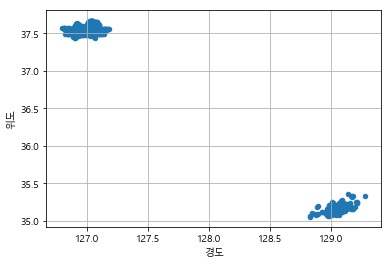

In [16]:
shop_2018[:1000].plot.scatter(x="경도", y="위도", grid="True")

In [17]:
df_seoul = shop_2018.loc[shop_2018['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(330089, 39)

In [18]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          285856
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      19088
표준산업분류명       19088
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         62453
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        289290
건물관리번호            0
건물명          176500
도로명주소             0
구우편번호             0
신우편번호             2
동정보          305116
층정보           97585
호정보          283475
경도                0
위도                0
dtype: int64

In [19]:
df_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

In [20]:
df_seoul.describe(include=np.object)

상호명    지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
count   330089  44233    330089   330089    330089   330089    330089   
unique  233567  15087         9        9        94       94       686   
top         CU     본점         Q       음식       Q01       한식    Q01A01   
freq      1450    294    109766   109766     35778    35778     23721   

         상권업종소분류명 표준산업분류코드  표준산업분류명  ...      법정동명   대지구분명  \
count      330089   311001   311001  ...    330089  330089   
unique        686      210      210  ...       465       2   
top     한식/백반/한정식   I56111  한식 음식점업  ...       신림동      대지   
freq        23721    43878    43878  ...      6759  329735   

                        지번주소           도로명                     건물관리번호  \
count                 330089        330089                     330089   
unique                124181         11861                     124735   
top     서울특별시 종로구 종로6가 262-1  서울특별시 종로구 종로  1111016400102700003012054   
freq                     976          2352                       1008   

            건물명             도로명주소    동정보     층정보    호정보  
count    153589            330089  24973  232504  46614  
unique    25179            123973    914     115   2494  
top     동대문종합시장  서울특별시 종로구 종로 266      1       1      1  
freq       1011               995   4307  161124   5469  

[4 rows x 23 columns]

In [21]:
df_seoul[['위도', '경도']].describe(include=np.number)

위도             경도
count  330089.000000  330089.000000
mean       37.545992     126.994943
std         0.049406       0.081294
min        37.434081     126.768169
25%        37.505306     126.925013
50%        37.543243     127.009046
75%        37.574720     127.055651
max        37.692398     127.182588

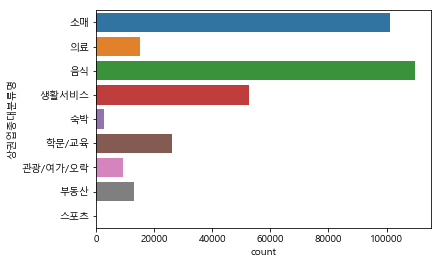

In [22]:
sns.countplot(data=df_seoul, y="상권업종대분류명")

In [23]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(109766, 39)

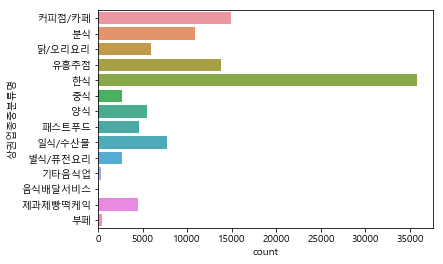

In [24]:
sns.countplot(data=df_food, y="상권업종중분류명")

In [25]:
df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.shape

(4605, 39)

In [26]:
df_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [27]:
df_fast_food['상호명'].unique()

array(['피자마루', '롯데리아', '배스킨라빈스', ..., '브리웰', '베이크럽', '델리'], dtype=object)

In [28]:
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape

(438, 39)

In [29]:
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', 
               '지번주소', '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df_31.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도',
       '시군구명', '행정동명'],
      dtype='object')

In [30]:
df_31.head()

상호명     지점명 상권업종대분류명 상권업종중분류명                    지번주소  \
63           배스킨라빈스   관악구청점       음식    패스트푸드    서울특별시 관악구 봉천동 863-13   
1564    던킨도너츠테크노마트점  테크노마트점       음식    패스트푸드     서울특별시 광진구 구의동 546-4   
1921     던킨도너츠창동하나로     NaN       음식    패스트푸드       서울특별시 도봉구 창동 1-10   
1958  던킨도너츠용산민자역사2호     NaN       음식    패스트푸드  서울특별시 용산구 한강로3가 40-999   
2459          던킨도너츠   잠실본동점       음식    패스트푸드     서울특별시 송파구 잠실동 242-9   

                     도로명주소         위도          경도 시군구명  행정동명  
63       서울특별시 관악구 관악로 161  37.479599  126.952166  관악구   청룡동  
1564  서울특별시 광진구 광나루로56길 85  37.535713  127.095681  광진구  구의3동  
1921   서울특별시 도봉구 마들로11길 20  37.655101  127.050818  도봉구   창4동  
1958  서울특별시 용산구 한강대로21나길 7  37.527903  126.963223  용산구  한강로동  
2459   서울특별시 송파구 석촌호수로 118  37.507431  127.090005  송파구  잠실본동

In [31]:
df_31['상호명'].value_counts()

배스킨라빈스31                102
던킨도너츠                    86
배스킨라빈스                   44
던킨도넛                      4
배스킨라빈스31선릉점               1
배스킨라빈스31남부터미널역점           1
배스킨라빈스31천호로데오점            1
비알코리아던킨도너츠중               1
배스킨라빈스31CAFE31이대          1
배스킨라빈스31목동이마트점            1
배스킨라빈스31상봉역점              1
배스킨라빈스31대치2호점             1
성북역맞이방던킨도너츠               1
던킨도너츠창동하나로                1
던킨도너츠아이비케이                1
배스킨라빈스31양재매헌점             1
던킨도너츠올림픽공원점               1
배스킨라빈스31아현뉴타운점            1
배스킨라빈스31면목역점              1
던킨도너츠중앙보훈병원점              1
배스킨라빈스31중곡역점              1
배스킨라빈스31양천신월점             1
배스킨라빈스용산후암                1
던킨도너츠동대문홈플러스              1
배스킨라빈스31둔촌역점              1
던킨도너츠합정역사점                1
배스킨라빈스31명동1호점             1
배스킨라빈스31까치산역점             1
배스킨라빈스31구로오류동             1
배스킨라빈스동대문홈플러스             1
                       ... 
배스킨라빈스31중앙대점              1
배스킨라빈스31서초점               1
배스킨라빈스31은평뉴타운점            1
배스킨라빈스31방화동점              1
배스킨라빈스31한양대점        

In [32]:
df_31['브랜드명'] = ''

In [33]:
df_31[['상호명', '브랜드명']].head()

상호명 브랜드명
63           배스킨라빈스     
1564    던킨도너츠테크노마트점     
1921     던킨도너츠창동하나로     
1958  던킨도너츠용산민자역사2호     
2459          던킨도너츠

In [35]:
df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [36]:
df_31[['상호명', '브랜드명']].head()

상호명    브랜드명
63           배스킨라빈스  배스킨라빈스
1564    던킨도너츠테크노마트점   던킨도너츠
1921     던킨도너츠창동하나로   던킨도너츠
1958  던킨도너츠용산민자역사2호   던킨도너츠
2459          던킨도너츠   던킨도너츠

In [37]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    290
던킨도너츠     148
Name: 브랜드명, dtype: int64

In [38]:
df_31_ratio = df_31_group_count[0]/df_31_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 {0:.2f}배가량 많습니다.'.format(df_31_ratio))

제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 1.96배가량 많습니다.


In [39]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 63 to 476000
Data columns (total 11 columns):
상호명         438 non-null object
지점명         369 non-null object
상권업종대분류명    438 non-null object
상권업종중분류명    438 non-null object
지번주소        438 non-null object
도로명주소       438 non-null object
위도          438 non-null float64
경도          438 non-null float64
시군구명        438 non-null object
행정동명        438 non-null object
브랜드명        438 non-null object
dtypes: float64(2), object(9)
memory usage: 41.1+ KB


In [40]:
df_31['위도'] = df_31['위도'].astype(float)
df_31['경도'] = df_31['경도'].astype(float)

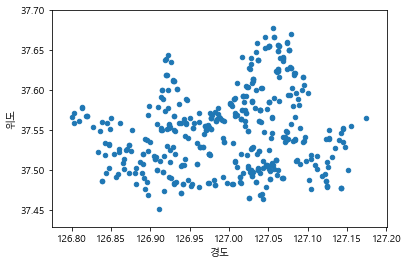

In [41]:
df_31.plot.scatter(x='경도', y='위도')

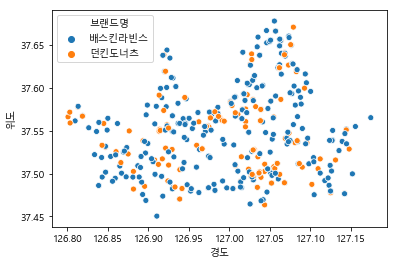

In [45]:
sns.scatterplot(data=df_31, x='경도', y='위도', hue="브랜드명")

In [46]:
geo_df = df_31.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'pink'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [47]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'red'
    else:
        icon_color = 'blue'    
    
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
    folium.CircleMarker(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

In [48]:
df_bread = df_seoul.loc[
    df_seoul['상호명'].str.contains('뚜레쥬르|파리(바게|크라상)') &
    (~df_seoul['상호명'].str.contains('파스쿠찌|잠바주스'))
].copy()
# 파스쿠찌 상호명에 파리크라상이 들어가기 때문에 파스쿠찌는 제외합니다.
df_bread.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(628, 39)

In [49]:
df_bread['상호명'].value_counts()

파리바게뜨              199
뚜레쥬르               122
파리크라상               11
파리바게뜨월계미성            2
씨제이뚜레쥬르              2
파리바게뜨카페대학로점          2
파리바게뜨성북점             2
파리바게뜨테헤란로점           1
파리바게뜨뱅뱅사거리점          1
파리바게뜨청담사거리점          1
씨제이뚜레쥬르풍납현대          1
뚜레쥬르개봉역점             1
뚜레쥬르대림3동점            1
파리바게뜨여의경도점           1
뚜레쥬르배명사거리점           1
여의도2호파리크라상           1
파리바게뜨마천점             1
파리바게뜨구로제일점           1
파리바게뜨목동8단지점          1
파리바게뜨목동오거리점          1
파리바게뜨발산중앙점           1
파리바게뜨신길돈보스코점         1
파리바게뜨당산역삼성           1
파리바게뜨문정카페            1
뚜레쥬르카페안암역점           1
파리바게트삼성화재            1
파리바게뜨망원점             1
씨제이푸드빌뚜레쥬르배명사거리      1
강동경희파리바게뜨            1
파리바게트도곡렉슬            1
                  ... 
뚜레쥬르독산지식센터점          1
파리바게뜨회기역점            1
파리바게뜨이수자이점           1
파리바게뜨동답한신점           1
파리바게뜨수락리버시티          1
뚜레쥬르양천푸른점            1
뚜레쥬르우장산역점            1
파리바게트갤러리아팰리스         1
파리바게뜨카페전농삼성점         1
파리바게뜨구로고대            1
뚜레쥬르공덕역점             1
파리바게뜨월곡두산점           1
뚜레쥬르독립문    

In [50]:
df_bread.loc[df_bread['상호명'].str.contains('파리(바게|크라상)'), '브랜드명'] = '파리바게뜨'
df_bread.loc[df_bread['상호명'].str.contains('뚜레(쥬|주)르'), '브랜드명'] = '뚜레쥬르'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [51]:
df_bread_group_count = df_bread['브랜드명'].value_counts()
df_bread_group_count

파리바게뜨    434
뚜레쥬르     194
Name: 브랜드명, dtype: int64

In [52]:
df_bread_ratio = df_bread_group_count[0]/df_bread_group_count[1]
print(f'제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 {df_31_ratio:.2f}배가량 많습니다.')

제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 1.96배가량 많습니다.


In [53]:
df_tou = df_bread[df_bread["브랜드명"] == "뚜레쥬르"]
df_paris = df_bread[df_bread["브랜드명"] == "파리바게뜨"]

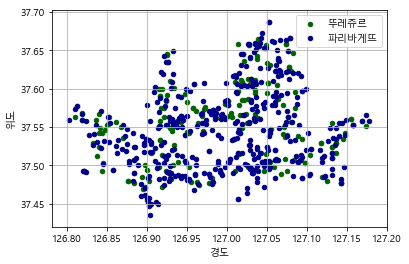

In [54]:
ax = df_tou[["경도", "위도", "브랜드명"]].plot.scatter(x='경도', y='위도', 
                                               color='DarkGreen', label='뚜레쥬르')
df_paris[["경도", "위도", "브랜드명"]].plot.scatter(x='경도', y='위도', 
                                            color='DarkBlue', label='파리바게뜨', 
                                            ax=ax, grid=True)

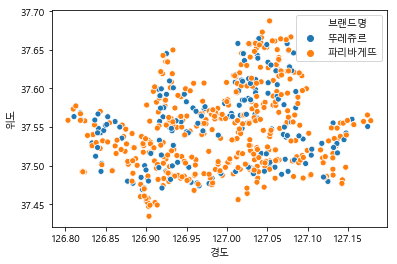

In [55]:
sns.scatterplot(data=df_bread, x='경도', y='위도', hue='브랜드명')

In [56]:
geo_df = df_bread.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '뚜레쥬르' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [57]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '뚜레쥬르' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
      
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

In [58]:
df_seoul.loc[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '상호명'].shape

(438,)

In [59]:
df_seoul.loc[df_seoul['상호명'].str.contains('이디야|ediya|EDIYA'), '상호명'].shape

(452,)

In [60]:
df_cafe = df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')]
df_cafe.shape

(890, 39)

In [61]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '스타벅스'

In [62]:
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [63]:
df_cafe.loc[df_cafe['브랜드명'].isnull(), '상호명'].head()

Series([], Name: 상호명, dtype: object)

In [64]:
df_cafe[['상호명','브랜드명']].head()

상호명  브랜드명
1492                 이디야커피   이디야
1682             스타벅스종로3가점  스타벅스
2419                 이디야커피   이디야
7271   이디야커피중계롯데우성점중계롯데우성점   이디야
12008                이디야커피   이디야

In [65]:
df_cafe['브랜드명'].value_counts()

이디야     452
스타벅스    438
Name: 브랜드명, dtype: int64

In [66]:
geo_df = df_cafe

In [67]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map